# Probabilities, Likelihoods, and Bayes Theorem

Created: 08/25/2023 by Tom Lever

Updated: 08/25/2023 by Tom Lever

**SUMMARY**: In this notebook we will be reviewing some probability distributions, showing histograms and scatterplots to visualize the distributions in Python in Section 1. In Section 2 we define likelihoods, and show how to compute them in Python. In Section 3 we explain Bayes Theorem, and show how to use Bayes Theorem to compute the posterior probability for parameters based on observed data, using the likelihoods from Section 2.

## Section 1

In this section we generate samples from a variety of distributions and use seaborn and matplotlib to plot the resulting data.

First 5 values from uniform distribution:
[14.98629712  7.07030797 13.50888636  8.07783984  9.91489007]


C:\Users\Tom\AppData\Local\Temp\ipykernel_19640\2369518994.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


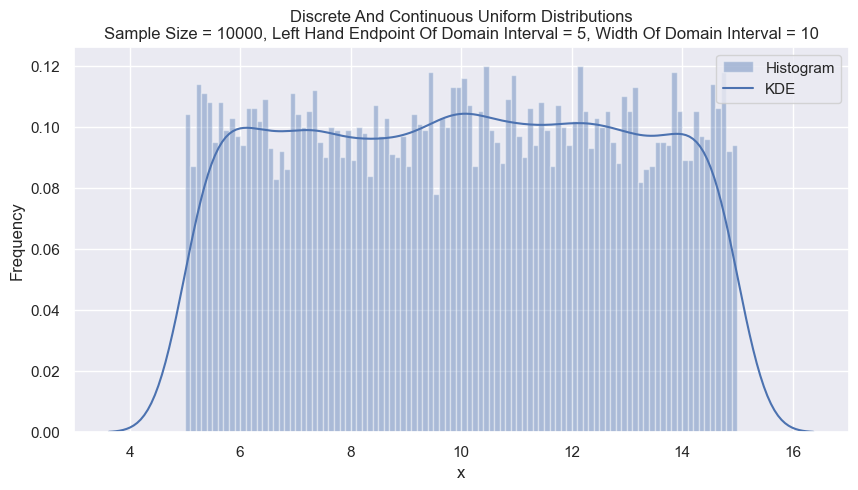

In [1]:
from scipy.stats import uniform
sample_size = 10000
left_hand_endpoint_of_domain_interval = 5
width_of_domain_interval = 10
array_of_uniformly_distributed_random_numbers = uniform.rvs(
    size = sample_size,
    loc = left_hand_endpoint_of_domain_interval,
    scale = width_of_domain_interval
)
print("First 5 values from uniform distribution:")
print(array_of_uniformly_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_uniformly_distributed_random_numbers,
    bins = 100,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Discrete And Continuous Uniform Distributions"
        + f"\nSample Size = {sample_size}, Left Hand Endpoint Of Domain Interval = {left_hand_endpoint_of_domain_interval}, Width Of Domain Interval = {width_of_domain_interval}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Discrete_And_Continuous_Uniform_Distributions.png")
plt.show()

First 5 values from normal distribution:
[4.59936449 5.02408385 4.34956248 4.29997273 2.20664173]


C:\Users\Tom\AppData\Local\Temp\ipykernel_19640\2142670968.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


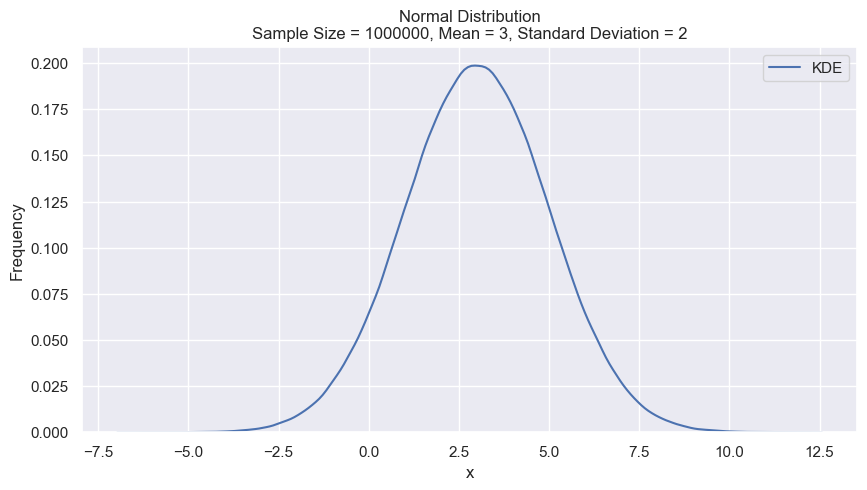

In [2]:
from scipy.stats import norm
sample_size = 1000000
mean = 3
standard_deviation = 2
array_of_normally_distributed_random_numbers = norm.rvs(
    size = sample_size,
    loc = mean,
    scale = standard_deviation
)
print("First 5 values from normal distribution:")
print(array_of_normally_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_normally_distributed_random_numbers,
    bins = 100,
    kde_kws = {"label": "KDE"},
    hist = False
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Normal Distribution"
        + f"\nSample Size = {sample_size}, Mean = {mean}, Standard Deviation = {standard_deviation}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Normal_Distribution.png")
plt.show()

In [3]:
array_of_normally_distributed_numbers = norm.rvs(size = 100, loc = 3, scale = 2)
print(array_of_normally_distributed_numbers)

[ 5.31515238  4.75111816  6.50305933  2.35295107  1.45498896  0.19404732
  2.11996866  6.43042826  4.93054379  1.21699574  1.08767533  0.81394582
  1.01464609  2.14972152  2.00130068  4.787524    4.5720667   2.45135857
 -0.58979393  3.81892345  7.72696779  4.47492195  4.91919355  5.32445063
  1.75617504  4.22151657  0.2004485   0.60166309  1.71953576  6.51125857
  5.03658955  3.53467044  1.73743822 -1.05723293  2.76733436  2.72635881
  1.51623463  2.02350527  2.05094023  4.2932114   3.73790149  3.08364358
  5.45762758  3.44754787  7.98752865  5.38786417  3.0086448   5.20599065
  1.34838177 -1.65402237  1.26399359  5.40036398  1.32673784  2.61194827
  1.68368306  1.79934351  4.27583879  5.11425306  4.26316105  0.30842478
  2.51280986  1.97430299  4.27427441  3.94565142  2.73071335  2.2286903
  7.09343681  3.58061993 -0.61266429  0.81363849  1.25448338  4.37153978
  6.76265545  2.87721332  3.87977917  5.43169641  3.04404693  3.6443325
  4.03855016  3.46959699  2.08161043  2.19658411  0.6

First 5 values from Bernoulli distribution:
[0 0 0 0 0]


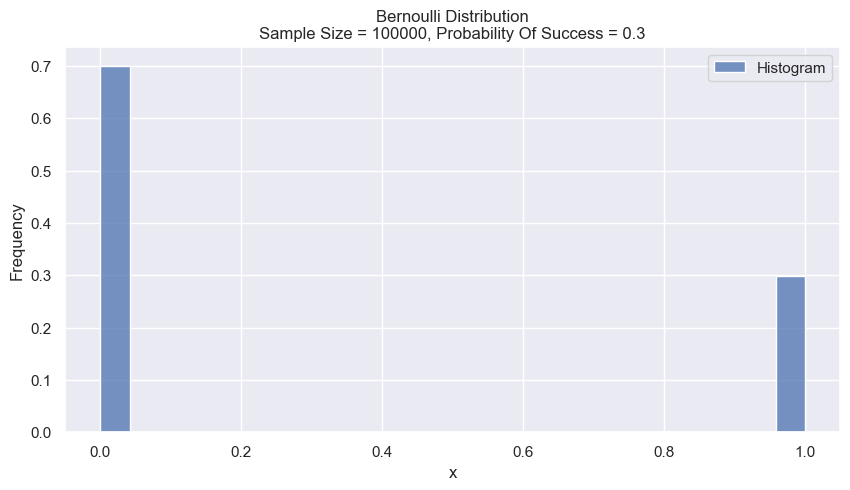

In [4]:
from scipy.stats import bernoulli
sample_size = 100000
probability_of_success = 0.3
array_of_Bernoulli_distributed_random_numbers = bernoulli.rvs(
    size = sample_size,
    p = probability_of_success
)
print('First 5 values from Bernoulli distribution:')
print(array_of_Bernoulli_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.histplot(
    data = array_of_Bernoulli_distributed_random_numbers,                  
    stat = "probability",
    label = "Histogram"
)
the_Axes.set(
    xlabel='x',
    ylabel='Frequency',
    title = (
        "Bernoulli Distribution"
        + f"\nSample Size = {sample_size}, Probability Of Success = {probability_of_success}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Bernoulli_Distribution.png")
plt.show()

First 5 values from binomial distribution:
[8 9 8 ... 6 6 7]


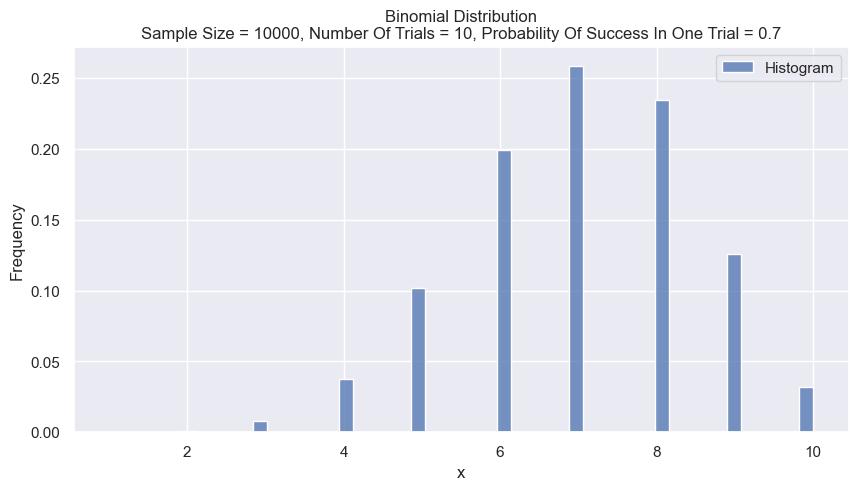

In [5]:
from scipy.stats import binom
sample_size = 10000
number_of_trials = 10
probability_of_success_in_one_trial = 0.7
array_of_binomially_distributed_numbers = binom.rvs(
    size = sample_size,
    n = number_of_trials,
    p = probability_of_success_in_one_trial
)
print("First 5 values from binomial distribution:")
print(array_of_binomially_distributed_numbers)
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.histplot(
    data = array_of_binomially_distributed_numbers,
    stat = "probability",
    label = "Histogram"
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Binomial Distribution"
        + f"\nSample Size = {sample_size}, Number Of Trials = {number_of_trials}, Probability Of Success In One Trial = {probability_of_success_in_one_trial}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Binomial_Distribution.png")
plt.show()

First 5 values from Poisson distribution:
[2 1 1 1 5]


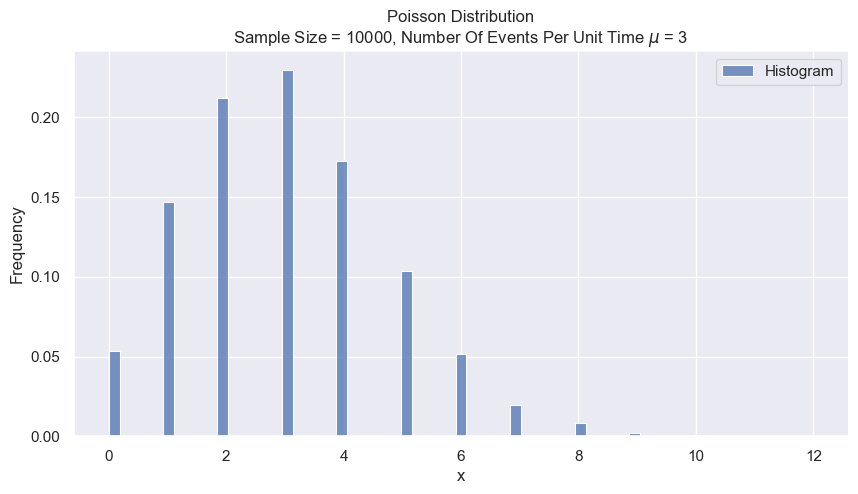

In [6]:
from scipy.stats import poisson
sample_size = 10000
number_of_events_per_unit_time_mu = 3
array_of_Poisson_distributed_numbers = poisson.rvs(
    size = sample_size,
    mu = number_of_events_per_unit_time_mu
)
print("First 5 values from Poisson distribution:")
print(array_of_Poisson_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.histplot(
    data = array_of_Poisson_distributed_numbers,
    stat = "probability",
    label = "Histogram"
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Poisson Distribution"
        + f"\nSample Size = {sample_size}, Number Of Events Per Unit Time " + r"$\mu$" + f" = {number_of_events_per_unit_time_mu}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Poisson_Distribution.png")
plt.show()

First 5 values from Beta distribution:
[0.01671954 0.0523685  0.22133444 0.03797749 0.08036329]


C:\Users\Tom\AppData\Local\Temp\ipykernel_19640\1727283562.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


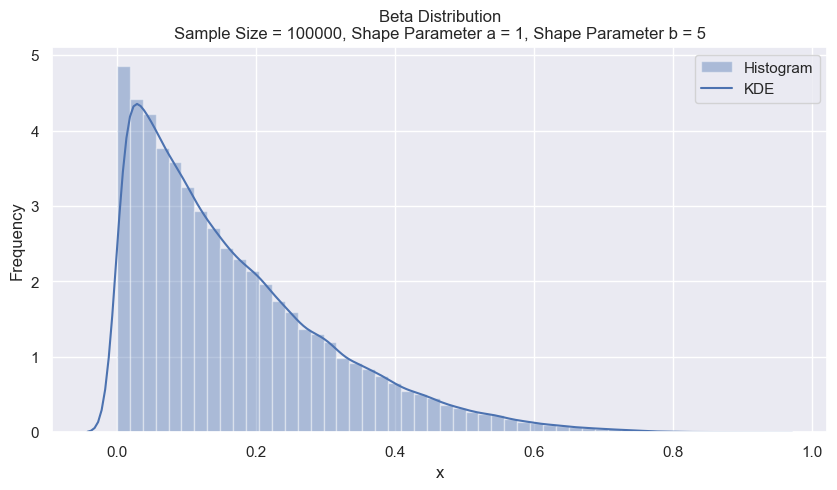

In [7]:
from scipy.stats import beta
sample_size = 100000
shape_parameter_a = 1
shape_parameter_b = 5
array_of_Beta_distributed_numbers = beta.rvs(
    size = sample_size,
    a = shape_parameter_a,
    b = shape_parameter_b
)
print("First 5 values from Beta distribution:")
print(array_of_Beta_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_Beta_distributed_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Beta Distribution"
        + f"\nSample Size = {sample_size}, Shape Parameter a = {shape_parameter_a}, Shape Parameter b = {shape_parameter_b}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Beta_Distribution.png")
plt.show()

First 5 values from Gamma distribution:
[ 3.4073425   7.38825542  1.36957783 11.20601454  4.83182591]


C:\Users\Tom\AppData\Local\Temp\ipykernel_19640\1689612271.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


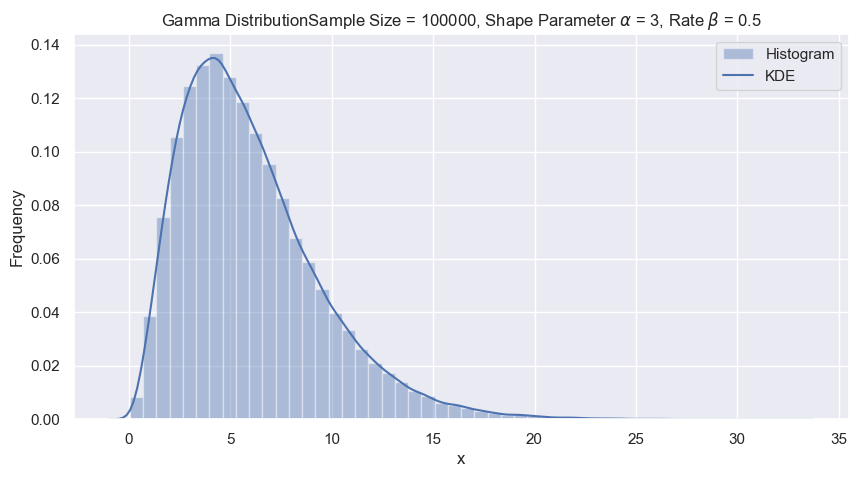

In [8]:
from scipy.stats import gamma
sample_size = 100000
shape_parameter_alpha = 3
rate_beta = 1 / 2
array_of_Gamma_distributed_random_numbers = gamma.rvs(
    size = sample_size,
    a = shape_parameter_alpha,
    scale = 1 / rate_beta
)
print("First 5 values from Gamma distribution:")
print(array_of_Gamma_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    array_of_Gamma_distributed_random_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        f"Gamma Distribution"
        + f"Sample Size = {sample_size}, Shape Parameter " + r"$\alpha$" + f" = {shape_parameter_alpha}, Rate " + r"$\beta$" + f" = {rate_beta}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Gamma_Distribution.png")
plt.show()


In [9]:
print('Comparing the data mean to the distribution mean:')
import numpy as np
print(np.mean(array_of_Gamma_distributed_random_numbers))
print(shape_parameter_alpha / rate_beta)

Comparing the data mean to the distribution mean:
5.997657212774022
6.0


First 5 values from Student's t distribution:
[ 0.23667661 -0.10776298 -0.20102024  0.33130515 -0.81194579]


C:\Users\Tom\AppData\Local\Temp\ipykernel_19640\1364990886.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


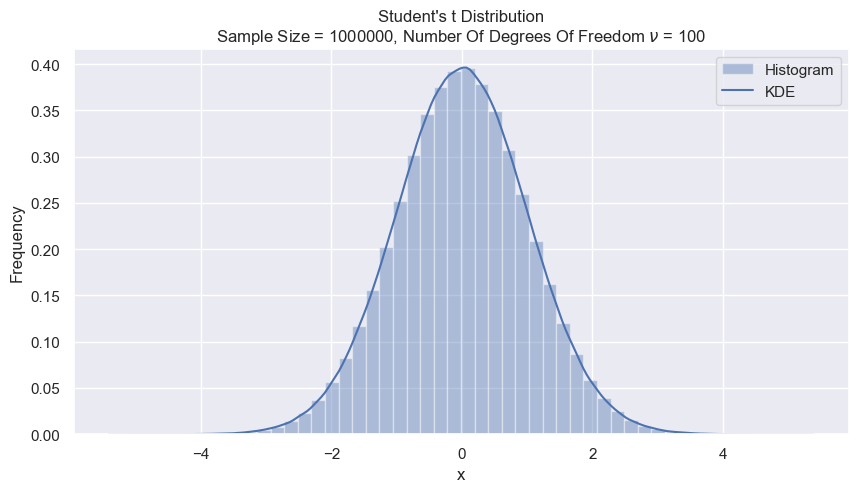

In [10]:
from scipy.stats import t
sample_size = 1000000
number_of_degrees_of_freedom_nu = 100
array_of_Students_t_distributed_numbers = t.rvs(
    size = sample_size,
    df = number_of_degrees_of_freedom_nu
)
print("First 5 values from Student's t distribution:")
print(array_of_Students_t_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_Students_t_distributed_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Student's t Distribution"
        + f"\nSample Size = {sample_size}, Number Of Degrees Of Freedom " + r"$\nu$" + f" = {number_of_degrees_of_freedom_nu}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Students_t_Distribution.png")
plt.show()

First 5 values from Cauchy distribution:
[ 1.43557576  0.25896166 -1.06712149  1.56272811 -2.70460634]


C:\Users\Tom\AppData\Local\Temp\ipykernel_19640\1685033659.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


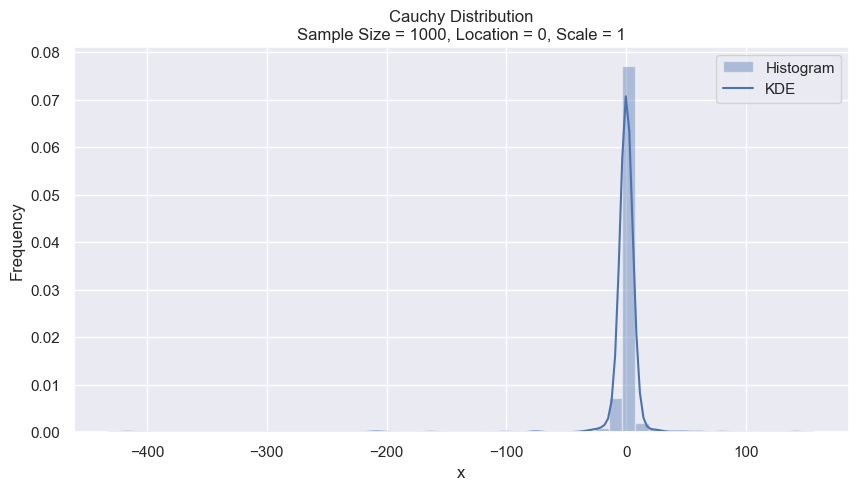

In [11]:
from scipy.stats import cauchy
sample_size = 1000
location = 0
scale = 1
array_of_Cauchy_distributed_numbers = cauchy.rvs(
    size = sample_size,
    loc = location,
    scale = scale
)
print("First 5 values from Cauchy distribution:")
print(array_of_Cauchy_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_Cauchy_distributed_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Cauchy Distribution"
        + f"\nSample Size = {sample_size}, Location = {location}, Scale = {scale}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Cauchy_Distribution.png")
plt.show()